In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('./eatdata/train.csv')
test = pd.read_csv('./eatdata/test.csv')
submission = pd.read_csv('./eatdata/sample_submission.csv')

In [3]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [4]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [5]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


<Figure size 864x432 with 0 Axes>

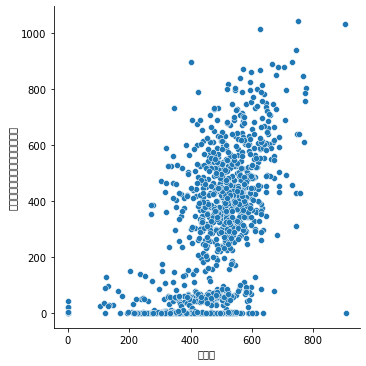

In [6]:
plt.figure(figsize=(12,6))
sns.relplot(train['석식계'], train['본사시간외근무명령서승인건수'])

<Figure size 864x432 with 0 Axes>

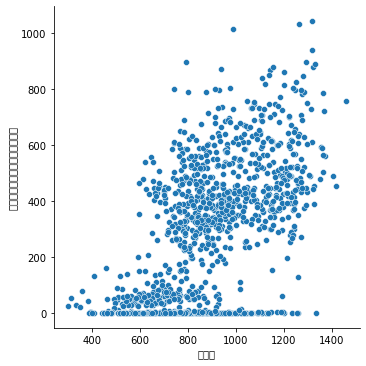

In [7]:
plt.figure(figsize=(12,6))
sns.relplot(train['중식계'], train['본사시간외근무명령서승인건수'])

<AxesSubplot:xlabel='요일', ylabel='석식계'>

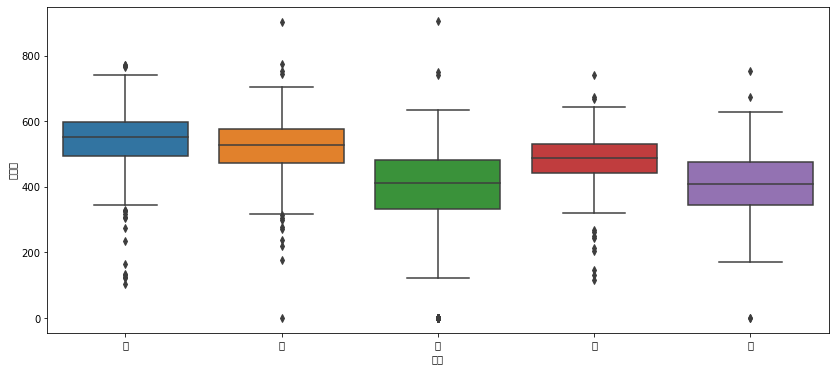

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(train['요일'], train['석식계'])

<AxesSubplot:xlabel='요일', ylabel='중식계'>

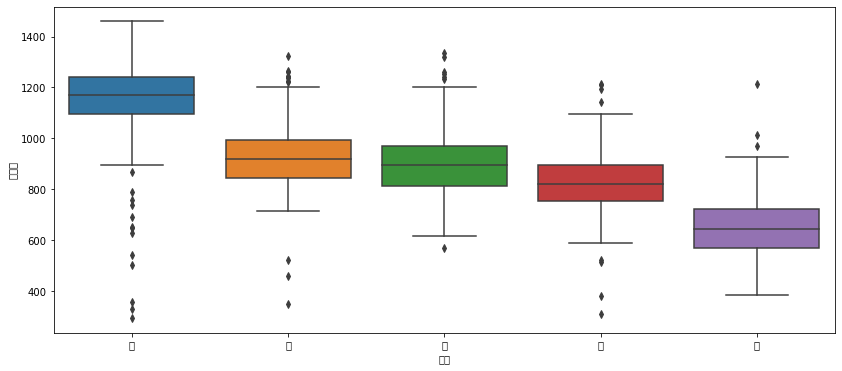

In [9]:
plt.figure(figsize=(14,6))
sns.boxplot(train['요일'], train['중식계'])

In [10]:
print(' train shape: ', train.shape, '\n', 'test shape: ', test.shape)

 train shape:  (1205, 12) 
 test shape:  (50, 10)


In [11]:
train = train.copy()
train.columns = ['date', 'dow', 'employees', 'dayoff', 'outside', 'overdue', 'home', 'morinig', 'lunch', 'dinner', 'lunch_number', 'dinner_number']
train.head()

,date,dow,employees,dayoff,outside,overdue,home,morinig,lunch,dinner,lunch_number,dinner_number
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [12]:
test = test.copy()
test.columns = ['date', 'dow', 'employees', 'dayoff', 'outside', 'overdue', 'home', 'morinig', 'lunch', 'dinner']
test.head()

,date,dow,employees,dayoff,outside,overdue,home,morinig,lunch,dinner
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [13]:
def to_datetime(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['dow'] = pd.to_datetime(df[date]).dt.weekday + 1
to_datetime(train, 'date'); to_datetime(test, 'date')

In [14]:
train.head()

,date,dow,employees,dayoff,outside,overdue,home,morinig,lunch,dinner,lunch_number,dinner_number
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [15]:
test.head()

,date,dow,employees,dayoff,outside,overdue,home,morinig,lunch,dinner
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,5,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,1,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,2,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1205 non-null   datetime64[ns]
 1   dow            1205 non-null   int64         
 2   employees      1205 non-null   int64         
 3   dayoff         1205 non-null   int64         
 4   outside        1205 non-null   int64         
 5   overdue        1205 non-null   int64         
 6   home           1205 non-null   float64       
 7   morinig        1205 non-null   object        
 8   lunch          1205 non-null   object        
 9   dinner         1205 non-null   object        
 10  lunch_number   1205 non-null   float64       
 11  dinner_number  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 113.1+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       50 non-null     datetime64[ns]
 1   dow        50 non-null     int64         
 2   employees  50 non-null     int64         
 3   dayoff     50 non-null     int64         
 4   outside    50 non-null     int64         
 5   overdue    50 non-null     int64         
 6   home       50 non-null     float64       
 7   morinig    50 non-null     object        
 8   lunch      50 non-null     object        
 9   dinner     50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 4.0+ KB


In [18]:
dinner = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') 
    tmp = ' '.join(tmp).split()    

    search = '('   
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    dinner.append(tmp) 

In [26]:
train.iloc[1066:1070, 7:]

,morinig,lunch,dinner,lunch_number,dinner_number
1066,모닝롤/와플 우유/주스 계란후라이 해물죽/쌀밥 순두부탕 노각무침 포기김치 (...,"돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국 양파링카레튀김 모듬어묵볶음 참나...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 부대찌개 (양지:호주산) 떡갈비조림 쫄면무침...",516.0,266.0
1067,모닝롤/야채샌드 우유/주스 계란후라이 녹두죽/쌀밥 건새우무채국 쑥갓두부무침 오이보트...,쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드...,쌀밥/잡곡밥 돈육김치찌개 깐풍기 고갈비구이 가지된장무침 포기김치,866.0,343.0
1068,모닝롤/크래미샌드 우유/주스 계란후라이 누룽지탕/쌀밥 참치김치찌개 느타리버섯장조림 ...,쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈,"김밥 미니우동 구슬떡볶이 김말이,고추튀김 다시마채무초무침 포기김치",675.0,441.0
1069,모닝롤/호떡 우유/주스 계란후라이 콩죽/쌀밥 북어무우국 베이컨숙주굴소스볶음 양상추샐...,카레라이스 동태알탕 부추고추전*간장 쫄면야채무침 과일요거트샐러드 포기김치 요구르트,쌀밥/잡곡밥 김치어묵국 케이준샐러드 섭산적표고굴소스볶음 매운콩나물무침 포기김치,607.0,269.0


In [32]:
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') 
    tmp = ' '.join(tmp).split()    

    search = '('   
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp) 

In [33]:
lunch[0:20]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치'],
 ['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '대구찌개', '마늘간장치킨', '새송이버섯볶음', '돌나물무침/치킨무', '요구르트', '포기김치'],
 ['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', '파래김*양념장', '부럼/요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '콩나물국', '돈육간장볶음', '버섯잡채', '꽃상추무침', '요구르트', '포기김치'],
 ['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '북어계란국', '닭갈비

In [34]:
lunch[1040:1090]

[['쌀밥/잡곡밥', '냉메밀소바', '히레카츠*소스', '견과류연근조림', '양배추채무침', '과일,프로바이오틱', '포기김치'],
 ['쌀밥/잡곡밥',
  '아욱수제비국',
  '해물섞어찜',
  '크레미계란말이',
  '통오이고추무침',
  '치커리유자샐러드,알로에주스',
  '깍두기',
  '고추가루:중국산)'],
 ['쌀밥/잡곡밥', '돈육김치찌개', '냉족발야채무침', '두부참치조림', '새송이*가지구이/양념', '사과,마시는요거트', '백김치'],
 ['쌀밥/잡곡밥', '열무물국수', '소갈비찜', '오징어링,새우튀김', '호박숙*양념장', '꽃맛살과일샐러드', '포기김치'],
 ['쌀밥/잡곡밥', '닭개장', '떡갈비', '골뱅이야채무침', '감자채볶음', '인절미츄러스맛탕,배즙', '포기김치'],
 ['소고기콩나물밥*양념',
  '들깨미역국',
  '바싹불고기*양파초절임',
  '야채스틱*견과쌈장',
  '고추장누들떡볶이',
  '파인애플,요플레',
  '포기김치'],
 ['쌀밥/잡곡밥', '유부주머니된장국', '생선까스*타르', '블랙페퍼쉬림프', '꽈리고추찹쌀무침', '해초샐러드,사과즙', '포기김치'],
 ['쌀밥/잡곡밥', '연두부탕', '제육볶음', '시금치프리타타', '모듬쌈*쌈장', '포기김치'],
 ['쌀밥/잡곡밥', '들깨수제비', '닭볶음탕', '도토리묵무침', '명엽채볶음', '포기김치'],
 ['닭살카레라이스', '미역미소시루', '후르츠탕수육', '비빔메밀면', '견과류멸치볶음', '포기김치'],
 ['쌀밥/잡곡밥', '차돌된장찌개', '주꾸미볶음', '두부스테이크', '청경채만다린생채', '포기김치'],
 ['소불고기덮밥', '맑은국', '야채비빔만두', '어묵볶음', '땅콩조림', '배추겉절이'],
 ['쌀밥/잡곡밥', '매콤콩나물국', '짬뽕불고기', '연두부*장', '쫑상추무침', '포기김치'],
 ['쌀밥/잡곡밥', '시래기국', '고추잡채*꽃빵', '동그랑땡구이', '청경채겉절이', '포기김치'],
 ['곤드레

In [27]:
dinner[0:15]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치'],
 ['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '대구찌개', '마늘간장치킨', '새송이버섯볶음', '돌나물무침/치킨무', '요구르트', '포기김치'],
 ['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', '파래김*양념장', '부럼/요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '콩나물국', '돈육간장볶음', '버섯잡채', '꽃상추무침', '요구르트', '포기김치'],
 ['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', '포기김치']]

In [28]:
dinner[1065:1070]

[['쌀밥/잡곡밥', '매운소고기국', '굴비구이', '토마토프리타타', '도라지오이무침', '배추겉절이'],
 ['돈육버섯고추장덮밥', '팽이무국', '양파링카레튀김', '모듬어묵볶음', '참나물생채', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순볶음', '포기김치', '양상추샐러드*딸기요거트'],
 ['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반', '배추겉절이', '양상추샐러드*오리엔탈'],
 ['카레라이스', '동태알탕', '부추고추전*간장', '쫄면야채무침', '과일요거트샐러드', '포기김치', '요구르트']]

In [36]:
np.array(train[ (train.index > 1060) & (train.index < 1080)][['date', 'lunch']])

array([[Timestamp('2020-06-05 00:00:00'),
        '베이컨김치볶음밥 (쌀:국내산) 냉모밀국수  해물부추전  야채고로케  수박  깍두기 (김치:국내산) '],
       [Timestamp('2020-06-08 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 대구탕  오삼불고기 (돈육:국내산) 해물동그랑땡  오이무침 요구르트 포기김치 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-09 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시금치된장국  닭볶음탕 (닭:국내산) 두부구이*양념장  미역줄기볶음  포기김치 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-10 00:00:00'),
        '나물비빔밥 (쌀:국내산) 오이사과냉국  치킨핑거 (닭:국내산) 맛살떡샐러드  깻잎순무침 요구르트 포기김치 (김치:국내산) '],
       [Timestamp('2020-06-11 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-12 00:00:00'),
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       [Timestamp('2020-07-01 00:00:00'),
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       [Timestamp('2020-07-02 00:00:00'),
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 '],
       [Timestamp('2020-07-03 

In [29]:
np.array(train[ (train.index > 1060) & (train.index < 1080)][['date', 'dinner']])

array([[Timestamp('2020-06-05 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 오징어국  매운닭찜  도토리묵야채무침  멸치볶음  포기김치 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-08 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 김치두부국  갈치튀김  햄계란말이  청경채생채  포기김치 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-09 00:00:00'),
        '삼겹살마늘볶음밥 (쌀,현미,흑미:국내산) 콩나물국  미니돈까스  양상추메추리알샐러드  꽈배기도너츠/요구르트  포기김치 (배추,고추가루:국내산) '],
       [Timestamp('2020-06-10 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 근대국  돈육간장볶음 (돈육:국내산) 동태포전  치커리배생채  포기김치 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-11 00:00:00'),
        '야채볶음밥 (쌀:국내산) 초계국수 (닭:국내산) 코코넛새우튀김  옥수수콘치즈  음료  포기김치 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-12 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 부대찌개 (양지:호주산) 떡갈비조림  쫄면무침  무나물들깨볶음  포기김치 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-07-01 00:00:00'),
        '쌀밥/잡곡밥 돈육김치찌개 깐풍기 고갈비구이 가지된장무침 포기김치 '],
       [Timestamp('2020-07-02 00:00:00'),
        '김밥 미니우동 구슬떡볶이 김말이,고추튀김 다시마채무초무침 포기김치 '],
       [Timestamp('2020-07-03 00:00:00'),
  

In [37]:
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; side.append(side_tmp)

In [40]:
train_lunch = train[['date', 'dow', 'employees', 'dayoff', 'outside', 'overdue', 'home', 'lunch', 'lunch_number']]
train_lunch['bob'] = bob
train_lunch['gook'] = gook
train_lunch['banchan1'] = banchan1; train_lunch['banchan2'] = banchan2; train_lunch['banchan3'] = banchan3
train_lunch['kimchi'] = kimchi 
train_lunch['side'] = side

In [42]:
train_lunch.iloc[1066:1070, 7:]

,lunch,lunch_number,bob,gook,banchan1,banchan2,banchan3,kimchi,side
1066,"돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국 양파링카레튀김 모듬어묵볶음 참나...",516.0,돈육버섯고추장덮밥,팽이무국,양파링카레튀김,모듬어묵볶음,참나물생채,포기김치,요구르트
1067,쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드...,866.0,쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,포기김치,양상추샐러드*딸기요거트
1068,쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈,675.0,쌀밥/잡곡밥,대파육개장,홍어미나리초무침,어묵잡채,콩자반,배추겉절이,양상추샐러드*오리엔탈
1069,카레라이스 동태알탕 부추고추전*간장 쫄면야채무침 과일요거트샐러드 포기김치 요구르트,607.0,카레라이스,동태알탕,부추고추전*간장,쫄면야채무침,과일요거트샐러드,포기김치,요구르트


In [43]:
train.head()

,date,dow,employees,dayoff,outside,overdue,home,morinig,lunch,dinner,lunch_number,dinner_number
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


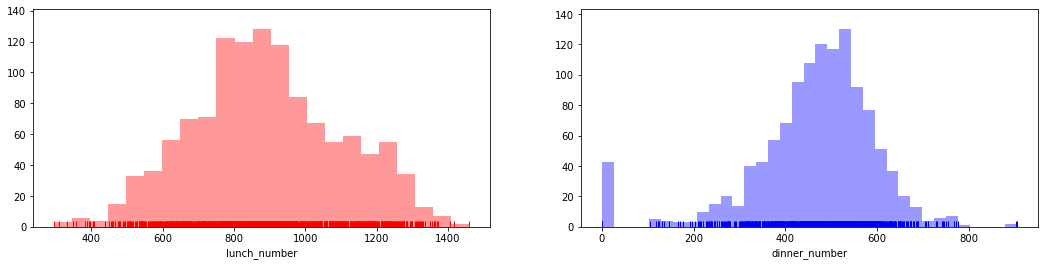

In [45]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train["lunch_number"], ax = ax[0], color = 'red', kde = False, rug = True)
sns.distplot(train["dinner_number"], ax = ax[1], color = 'blue', kde = False, rug = True)
plt.show()

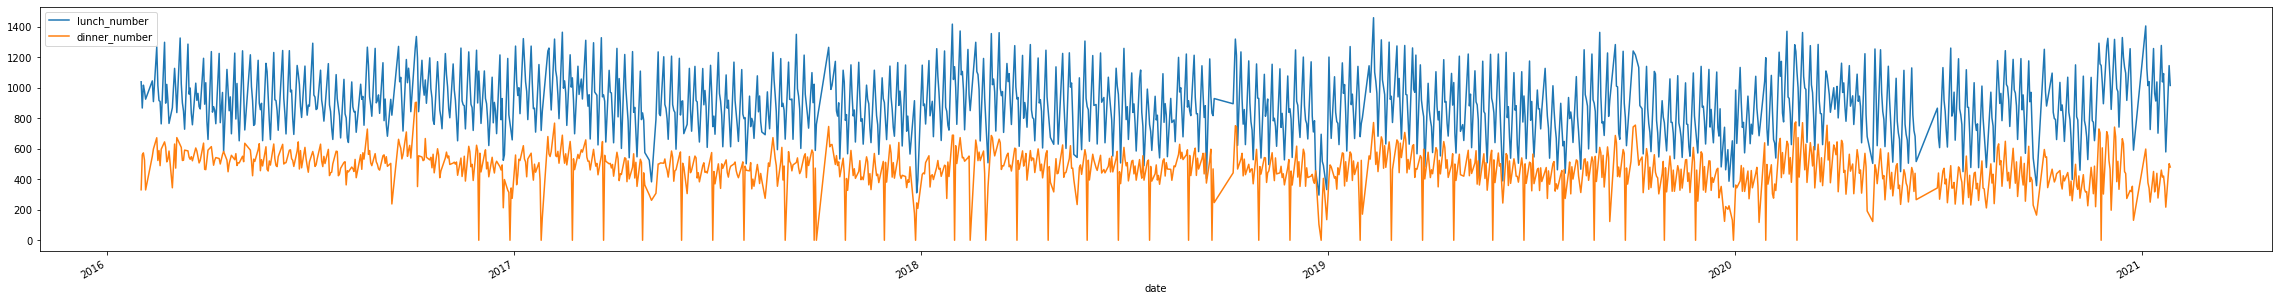

In [50]:
train.plot(x = 'date', y = ['lunch_number', 'dinner_number'], figsize = (40, 5))
plt.show()

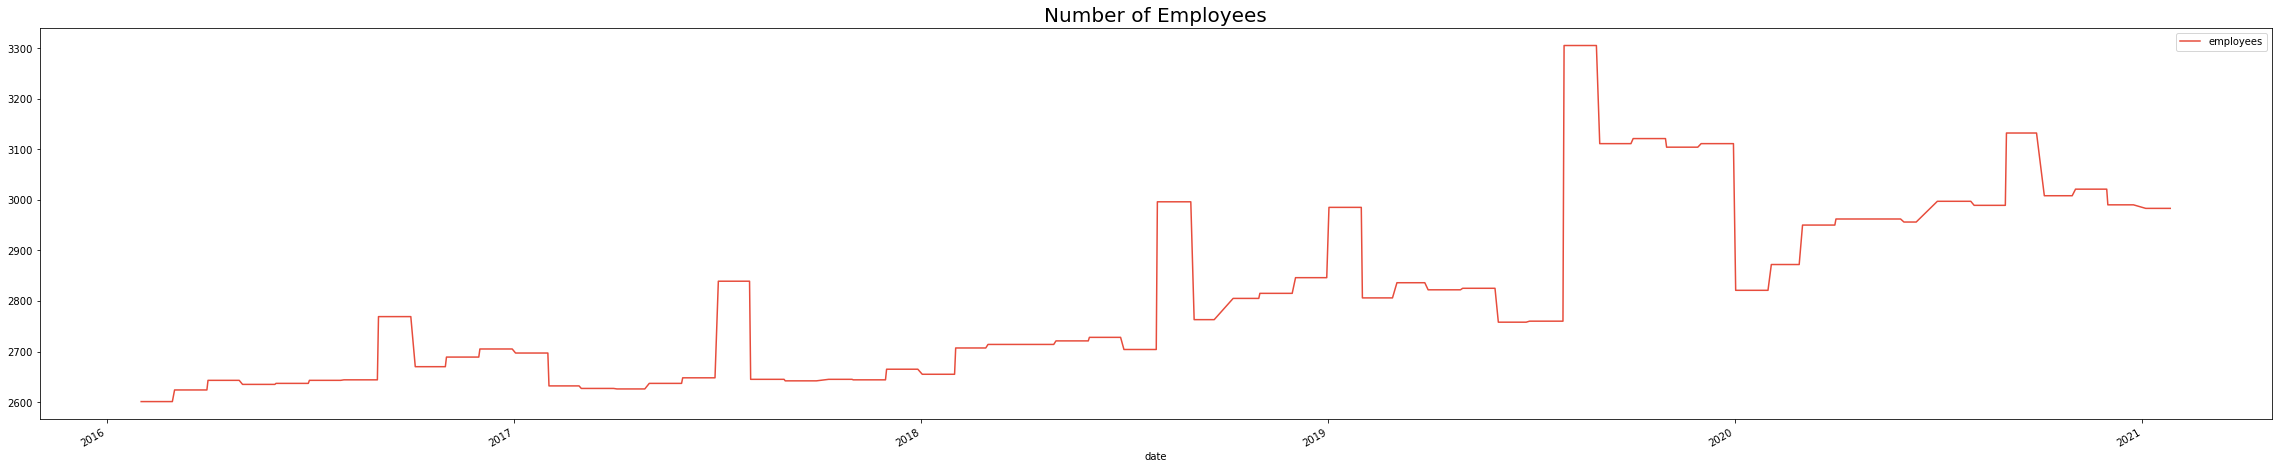

In [53]:
train.plot(x = 'date', y = 'employees', figsize = (40, 8), c = "#e74c3c")
plt.title("Number of Employees", fontsize = 20)
plt.show()

In [54]:
train.head()

,date,dow,employees,dayoff,outside,overdue,home,morinig,lunch,dinner,lunch_number,dinner_number
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


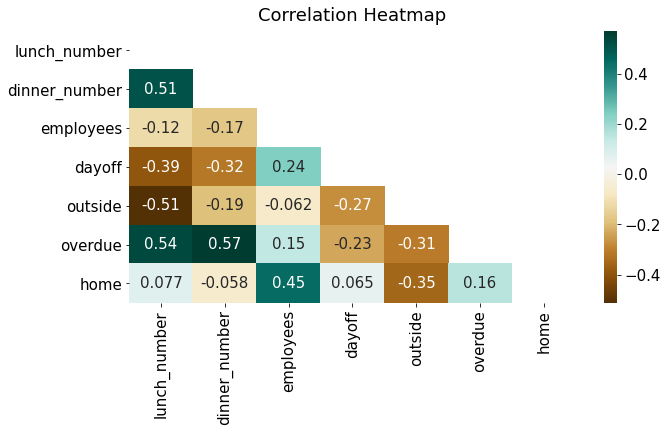

In [57]:
df = train[['lunch_number', 'dinner_number', 'employees', 'dayoff', 'outside', 'overdue', 'home']]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap="BrBG", 
            mask = mask)
ax.set_title('Correlation Heatmap', pad = 10)
plt.show()

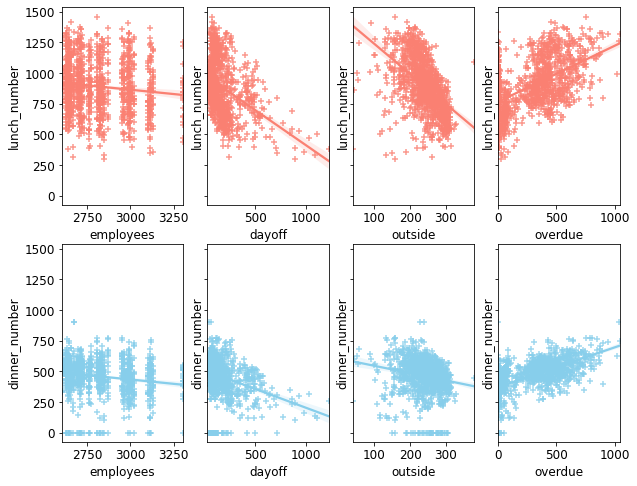

In [59]:
fig, ax = plt.subplots(figsize = (10, 8), ncols = 4, nrows = 2, sharey=True)
plt.rcParams['font.size'] = 12
sns.color_palette("Paired")
train_features = ['employees', 'dayoff', 'outside', 'overdue', 'employees', 'dayoff', 'outside', 'overdue']
for i, feature in enumerate(train_features):
    row = int(i/4)
    col = i%4 
    if i < 4:
        sns.regplot(x=feature, y = 'lunch_number', data = train, ax = ax[row][col], color = 'salmon', marker = '+')
    else: 
        sns.regplot(x=feature, y = 'dinner_number', data = train, ax = ax[row][col], color = 'skyblue', marker = '+')

In [60]:
train.head()

,date,dow,employees,dayoff,outside,overdue,home,morinig,lunch,dinner,lunch_number,dinner_number
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [62]:
drops = ['morinig', 'lunch', 'dinner']
train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)

In [67]:
train['realeat'] = train['employees'] - train['dayoff'] - train['home']
test['realeat'] = test['employees'] - test['dayoff'] - test['home']

In [70]:
train['realeatlunch'] = train['lunch_number'] / train['realeat']
train['realeatdinner'] = train['dinner_number'] / train['realeat']

In [71]:
features = ['date', 'dow', 'employees', 'outside', 'overdue']
labels = ['lunch_number','dinner_number', 'realeatlunch', 'realeatdinner']

train = train[features+labels]
test = test[features]

In [72]:
train.head()

,date,dow,employees,outside,overdue,lunch_number,dinner_number,realeatlunch,realeatdinner
0,2016-02-01,1,2601,150,238,1039.0,331.0,0.407291,0.129753
1,2016-02-02,2,2601,173,319,867.0,560.0,0.339867,0.219522
2,2016-02-03,3,2601,180,111,1017.0,573.0,0.399607,0.225147
3,2016-02-04,4,2601,220,355,978.0,525.0,0.391670,0.210252
4,2016-02-05,5,2601,181,34,925.0,330.0,0.398192,0.142058


In [73]:
test.head()

,date,dow,employees,outside,overdue
0,2021-01-27,3,2983,182,5
1,2021-01-28,4,2983,212,409
2,2021-01-29,5,2983,249,0
3,2021-02-01,1,2924,154,538
4,2021-02-02,2,2924,186,455


In [74]:
train.corr()[['realeatlunch', 'realeatdinner']]

,realeatlunch,realeatdinner
dow,-0.699826,-0.285934
employees,-0.239784,-0.275400
outside,-0.618408,-0.267198
overdue,0.473097,0.518348
lunch_number,0.957156,0.479768
dinner_number,0.475360,0.973722
realeatlunch,1.000000,0.511255
realeatdinner,0.511255,1.000000


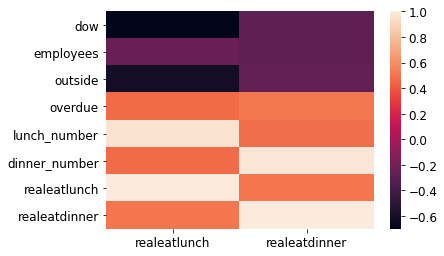

In [75]:
sns.heatmap(train.corr()[['realeatlunch', 'realeatdinner']]);

In [76]:
weekday_rank4dinner = {
    1: 1,
    2: 2,
    3: 5,
    4: 3,
    5: 4,
}

train['dow(dinner)'] = train['dow'].map(weekday_rank4dinner)
test['dow(dinner)'] = test['dow'].map(weekday_rank4dinner)

In [77]:
train.head()

,date,dow,employees,outside,overdue,lunch_number,dinner_number,realeatlunch,realeatdinner,dow(dinner)
0,2016-02-01,1,2601,150,238,1039.0,331.0,0.407291,0.129753,1
1,2016-02-02,2,2601,173,319,867.0,560.0,0.339867,0.219522,2
2,2016-02-03,3,2601,180,111,1017.0,573.0,0.399607,0.225147,5
3,2016-02-04,4,2601,220,355,978.0,525.0,0.391670,0.210252,3
4,2016-02-05,5,2601,181,34,925.0,330.0,0.398192,0.142058,4


In [81]:
submit = pd.read_csv('./eatdata/sample_submission.csv')

In [82]:
submit.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0
